# Decision Trees

Decision Trees work by splitting the data into subsets based on the value of input features, creating a tree-like structure of decisions.

### Key Concepts:
**Nodes**:
    - **Root Node**: The topmost node representing the entire dataset.
    - **Internal Nodes**: Represent decisions based on feature values.
    - **Leaf Nodes**: Represent the final output (class label or regression value).

**Splitting**:
    - The process of dividing a node into two or more sub-nodes based on a condition on a feature.

### Advantages:
    - Easy to interpret and visualize.
    - Handles both numerical and categorical data.
    - Requires minimal data preprocessing.

### Disadvantages:
    - Prone to overfitting, especially with deep trees.
    - Sensitive to small changes in data, leading to different splits.

In [185]:
# this section adds the package path to the system path so it can be used here
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))


import mltoolbox as ml # my module

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [186]:
# Load the CSV file into a pandas DataFrame
banknote_df = pd.read_csv('../../Datasets/data_banknote_authentication.csv', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
# where class 0 is real, class 1 is forged

# at line 763 it changes class

D = pd.concat([banknote_df.iloc[:100], banknote_df.iloc[762:862]]) # reduces the data set size to 50 of each

# so our lable is the class column,
y = D['class'].to_numpy()
X = D[['skewness', 'entropy']].values


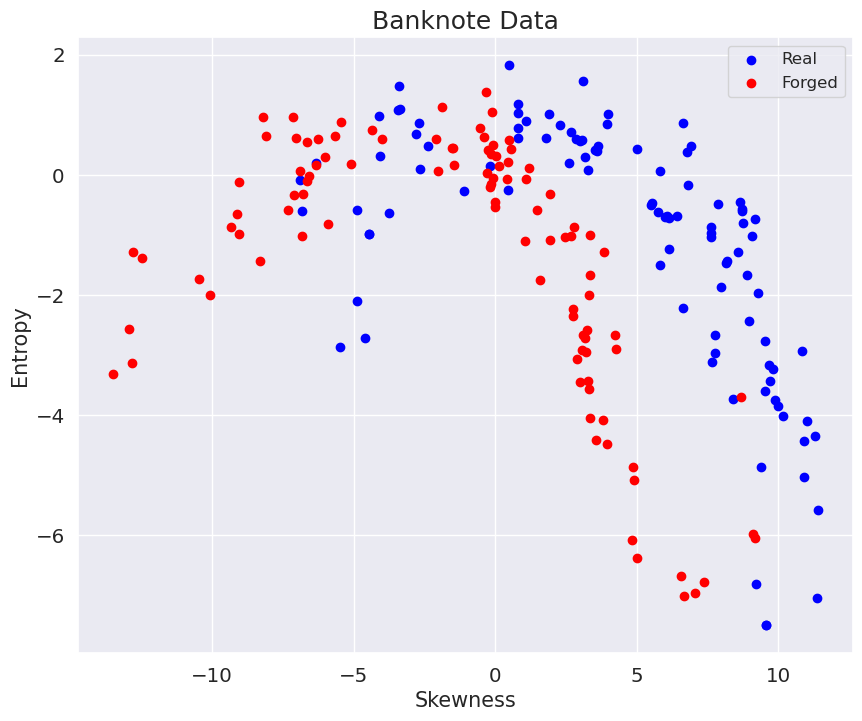

In [187]:
plt.figure(figsize=(10, 8))
plt.title("Banknote Data", fontsize=18)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Real')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Forged')

plt.xlabel("Skewness", fontsize=15)
plt.ylabel("Entropy", fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

In [189]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

|--- Skewness <= 5.25
|   |--- Entropy <= 0.37
|   |   |--- Skewness <= -0.71
|   |   |   |--- Skewness <= -5.70
|   |   |   |   |--- Entropy <= -0.63
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Entropy >  -0.63
|   |   |   |   |   |--- class: 1
|   |   |   |--- Skewness >  -5.70
|   |   |   |   |--- Entropy <= 0.13
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Entropy >  0.13
|   |   |   |   |   |--- class: 1
|   |   |--- Skewness >  -0.71
|   |   |   |--- Entropy <= 0.06
|   |   |   |   |--- class: 1
|   |   |   |--- Entropy >  0.06
|   |   |   |   |--- Skewness <= 1.87
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Skewness >  1.87
|   |   |   |   |   |--- class: 0
|   |--- Entropy >  0.37
|   |   |--- Skewness <= 0.69
|   |   |   |--- Entropy <= 1.60
|   |   |   |   |--- Skewness <= -2.12
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Skewness >  -2.12
|   |   |   |   |   |--- class: 1
|   |   |   |--- Entropy >  1.60
|   |   |   |   |--- class: 

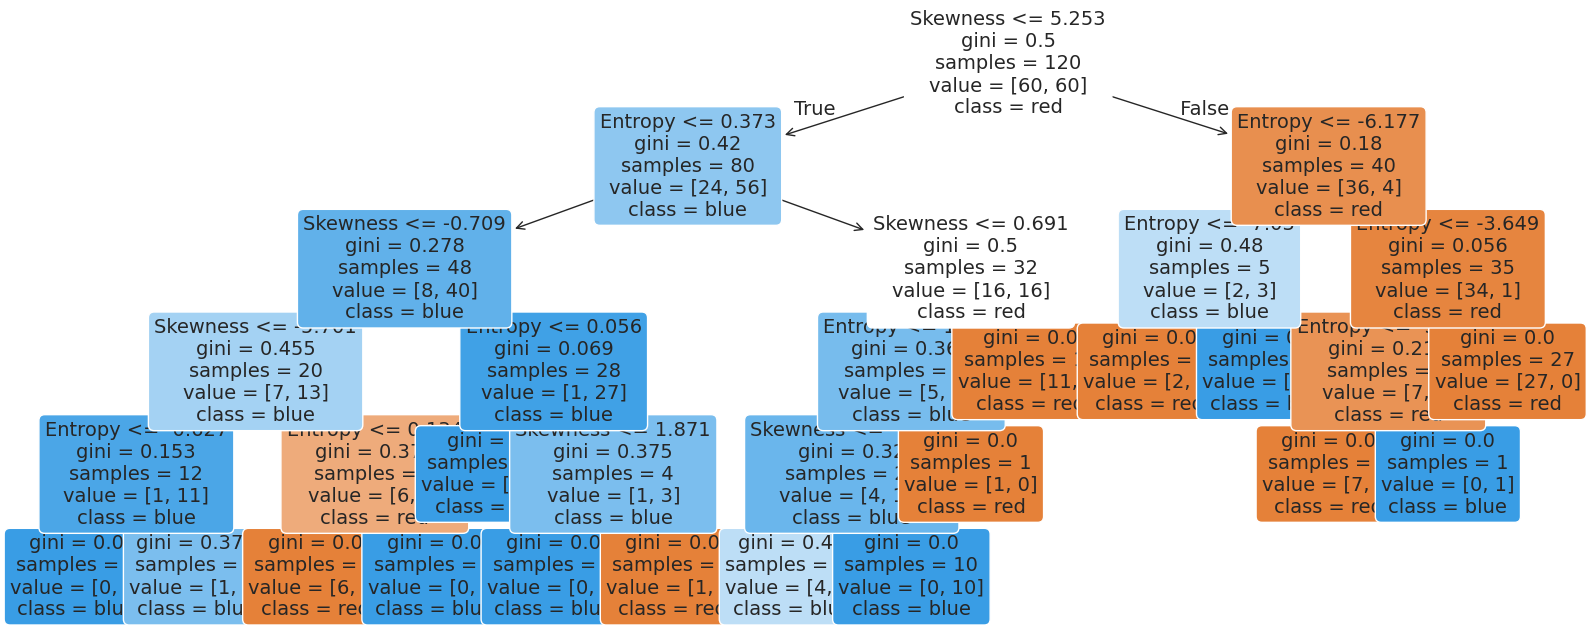

In [190]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["Skewness", "Entropy"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["Skewness", "Entropy"],
                   class_names = ["red", "blue"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

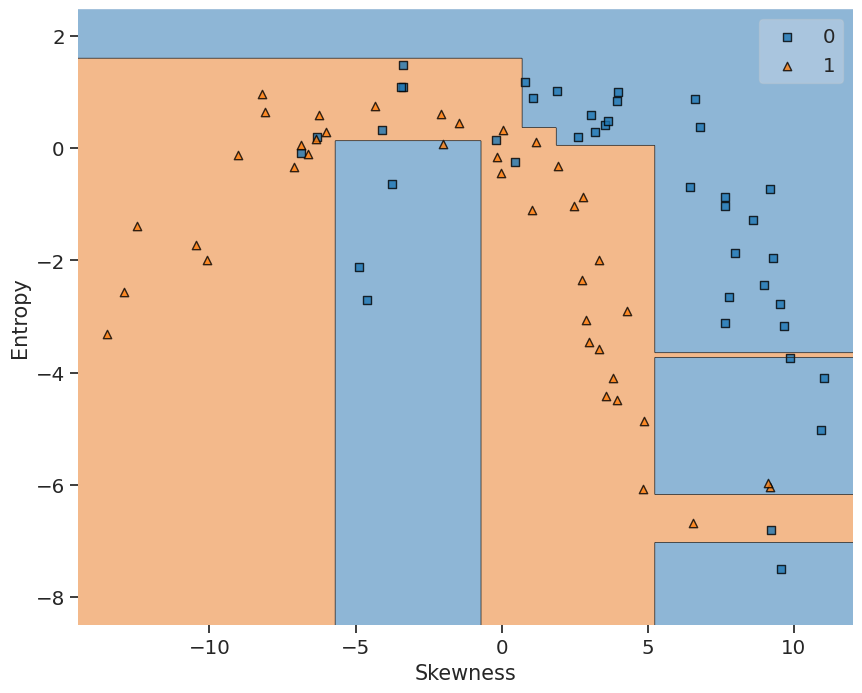

In [191]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X_test, y_test, clf = decision_tree)
plt.xlabel("Skewness", fontsize = 15)
plt.ylabel("Entropy", fontsize = 15)
plt.grid()
plt.show()

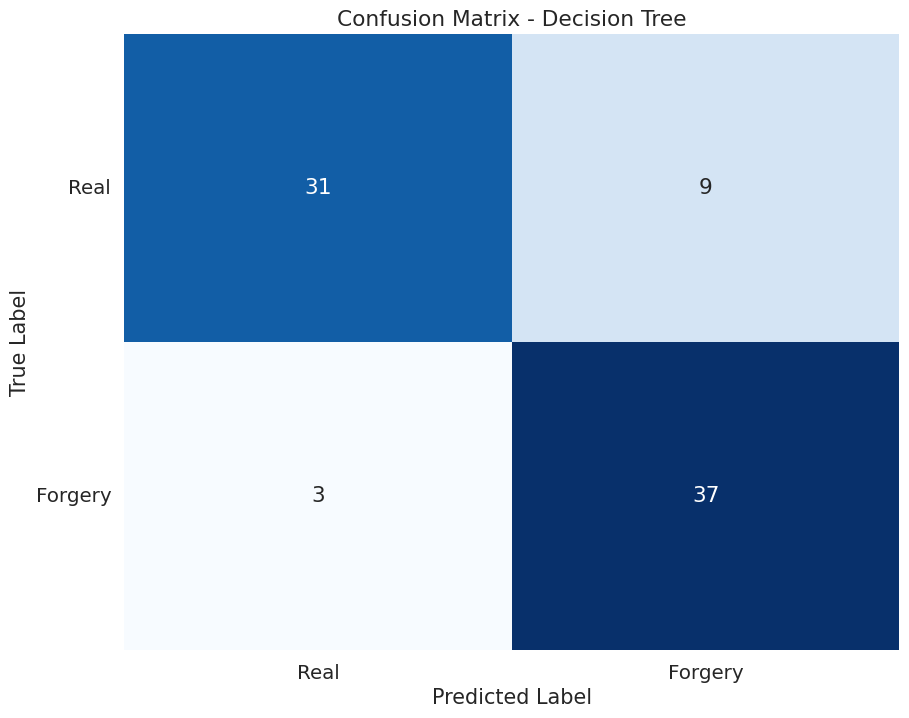

In [192]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot=True,
            fmt="g",
            ax=ax,
            cmap="Blues",  # Blue for high numbers, white for small numbers
            cbar=False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["Real", "Forgery"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["Real", "Forgery"], rotation=0)
plt.show()

### Regression Trees

Regression trees and decision trees are both types of tree-based models, but they serve different purposes:

- **Decision Trees**: These are used for classification tasks. They predict discrete class labels (e.g., "real" or "forged" in the banknote dataset). The splits in the tree are based on maximizing the separation of classes.

- **Regression Trees**: These are used for regression tasks. They predict continuous numerical values. The splits in the tree are based on minimizing the variance or mean squared error (MSE) of the target variable within each split.

Decision trees classify data into categories, while regression trees predict numerical outcomes.

MSE reg1: 0.20299999999999999 

MSE reg2: 0.175 



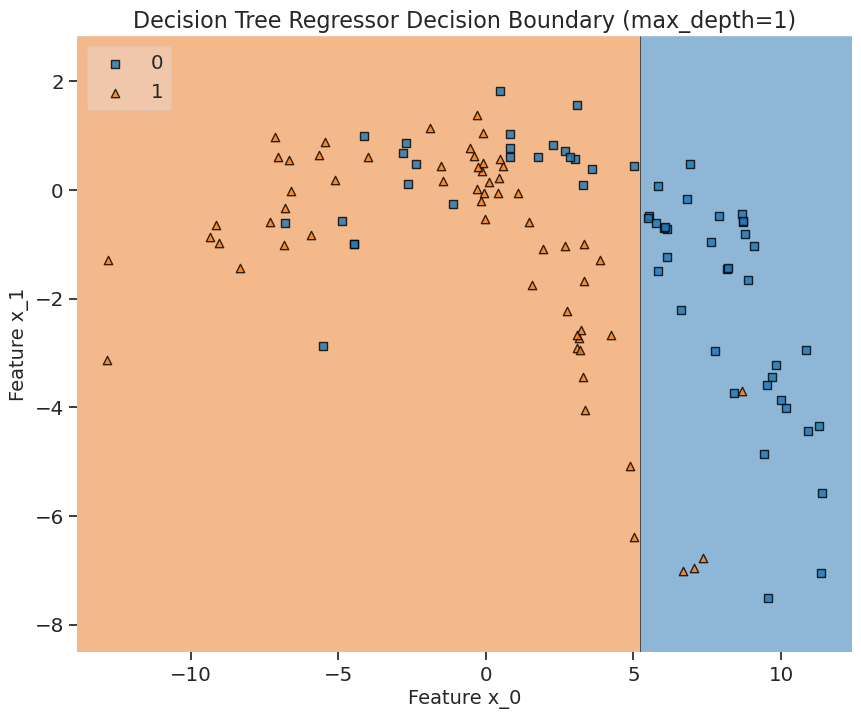

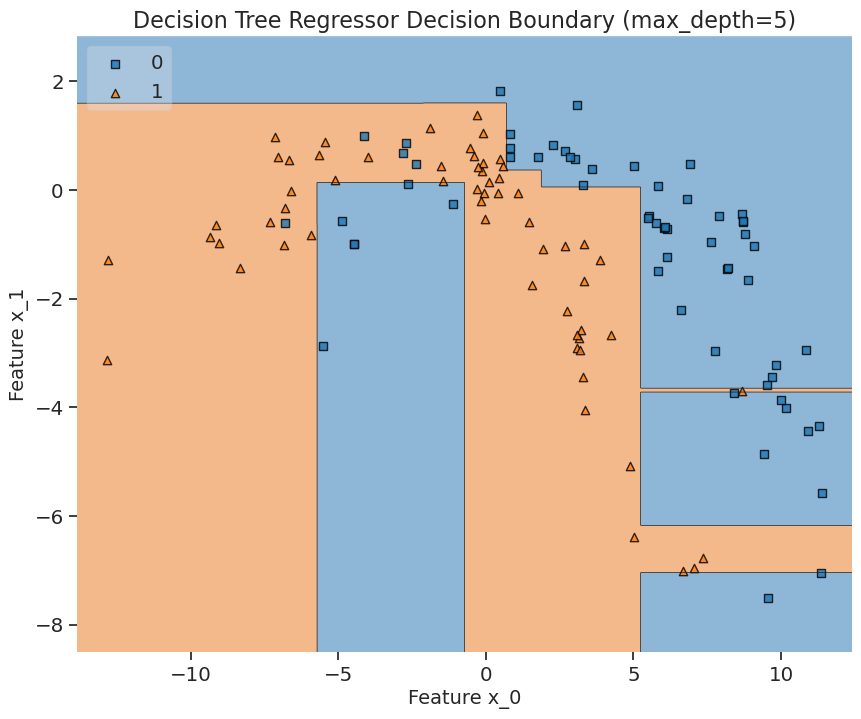

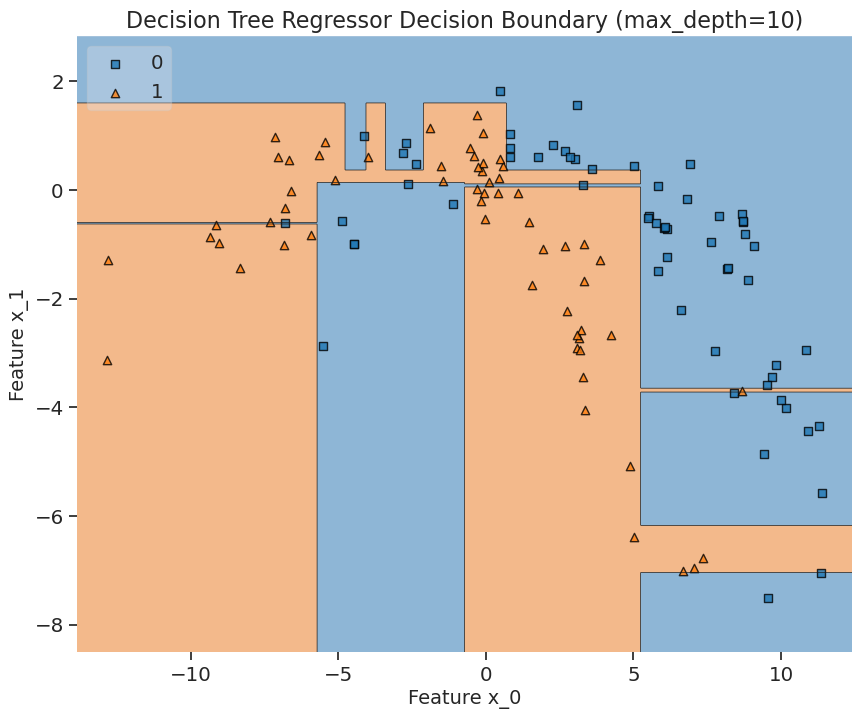

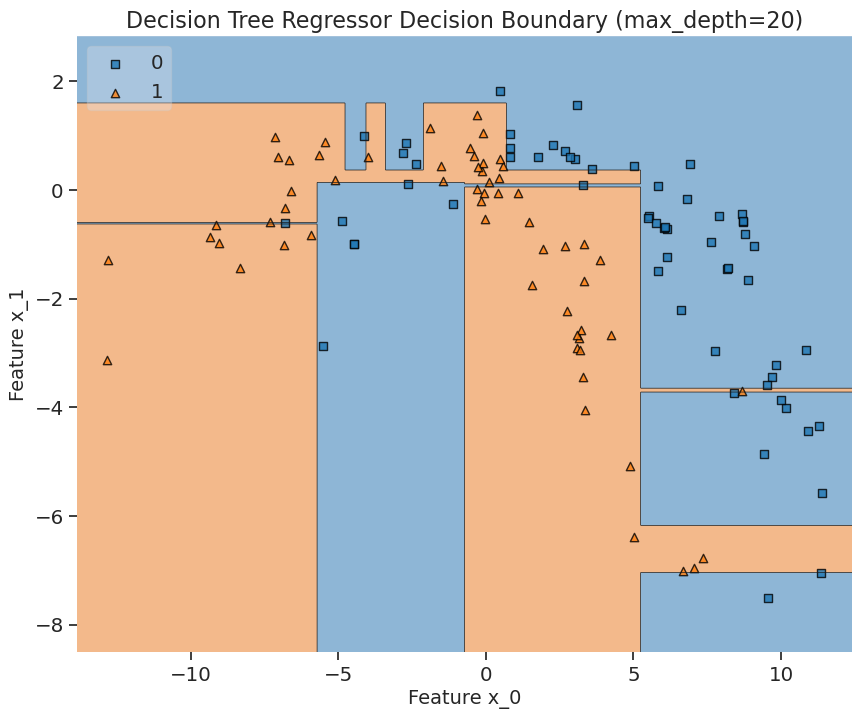

In [193]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

reg1 = DecisionTreeRegressor(max_depth=1, random_state = 12)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20, random_state = 12)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

# Plot the decision boundaries for different depths
for depth in [1, 5, 10, 20]:
    reg = DecisionTreeRegressor(max_depth=depth, random_state=12)
    reg.fit(X_train, y_train)
    
    plt.figure(figsize=(10, 8))
    plot_decision_regions(X_train, y_train, clf=reg, legend=2)
    plt.title(f"Decision Tree Regressor Decision Boundary (max_depth={depth})", fontsize=16)
    plt.xlabel("Feature x_0", fontsize=14)
    plt.ylabel("Feature x_1", fontsize=14)
    plt.grid()
    plt.show()

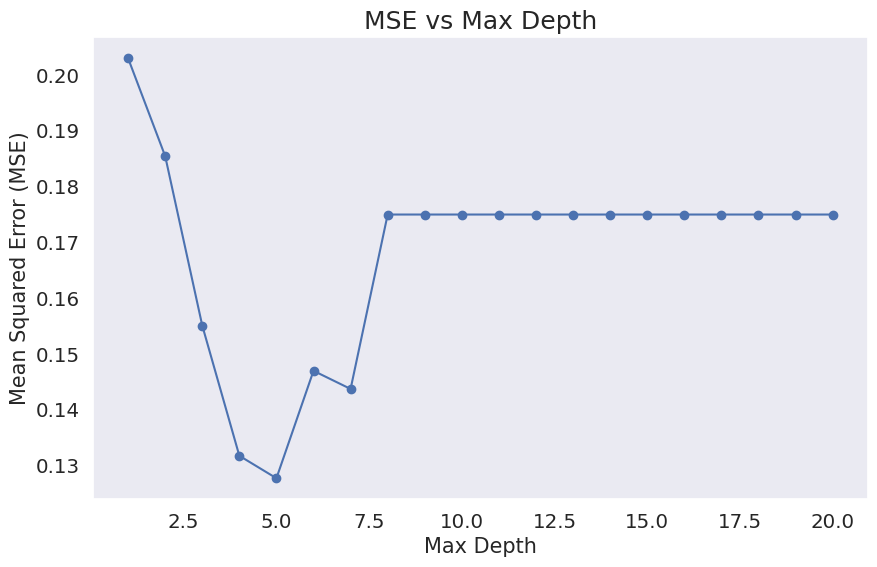

In [194]:
mse_values = []

# Loop through max_depth values from 1 to 20
for depth in range(1, 21):
    reg = DecisionTreeRegressor(max_depth=depth, random_state=12)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), mse_values, marker='o', linestyle='-', color='b')
plt.title("MSE vs Max Depth", fontsize=18)
plt.xlabel("Max Depth", fontsize=15)
plt.ylabel("Mean Squared Error (MSE)", fontsize=15)
plt.grid()
plt.show()

## Overfitting

The above plot is quite insightful as it highlights the effect of overfitting. Initially, the Mean Squared Error (MSE) decreases, indicating improved performance. However, after a certain point (depth of 8), the MSE stabilizes and begins to increase. 

This behavior occurs because the model starts fitting the training data perfectly, capturing even the noise. While every training point is classified correctly, this does not translate to better generalization on the test data. In fact, the performance on the test data worsens as the model overfits.